In [1]:
!pip install tensorflow==2.10.0 wandb matplotlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 1.9 MB 61.0 MB/s 
     |████████████████████████████████| 438 kB 66.2 MB/s 
     |████████████████████████████████| 5.9 MB 49.0 MB/s 
     |████████████████████████████████| 1.7 MB 56.7 MB/s 
     |████████████████████████████████| 168 kB 58.7 MB/s 
     |████████████████████████████████| 182 kB 44.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 73.5 MB/s 
     |████████████████████████████████| 166 kB 69.5 MB/s 
     |████████████████████████████████| 166 kB 78.9 MB/s 
     |████████████████████████████████| 162 kB 77.9 MB/s 
     |████████████████████████████████| 162 kB 69.0 MB/s 
     |████████████████████████████████| 158 kB 77.5 MB/s 
     |████████████████████████████████| 157 kB 74.0 MB/s 
     |███████████████████████████

In [2]:
label_mapping = {
0: 'apple',
1: 'aquarium_fish',
2: 'baby',

3: 'bear',

4: 'beaver',

5: 'bed',

6: 'bee',

7: 'beetle',

8: 'bicycle',

9: 'bottle',

10: 'bowl',

11: 'boy',

12: 'bridge',

13: 'bus',

14: 'butterfly',

15: 'camel',

16: 'can',

17: 'castle',

18: 'caterpillar',

19: 'cattle',

20: 'chair',

21: 'chimpanzee',

22: 'clock',

23: 'cloud',

24: 'cockroach',

25: 'couch',

26: 'cra',
27: 'crocodile',

28: 'cup',

29: 'dinosaur',

30: 'dolphin',

31: 'elephant',

32: 'flatfish',

33: 'forest',

34: 'fox',

35: 'girl',

36: 'hamster',

37: 'house',

38: 'kangaroo',

39: 'keyboard',
40: 'lamp',

41: 'lawn_mower',

42: 'leopard',

43: 'lion',
44: 'lizard',

45: 'lobster',

46: 'man',

47: 'maple_tree',

48: 'motorcycle',

49: 'mountain',

50: 'mouse',

51: 'mushroom',

52: 'oak_tree',

53: 'orange',

54: 'orchid',

55: 'otter',

56: 'palm_tree',

57: 'pear',

58: 'pickup_truck',

59: 'pine_tree',

60: 'plain',

61: 'plate',
62: 'poppy',

63: 'porcupine',

64: 'possum',

65: 'rabbit',

66: 'raccoon',

67: 'ray',

68: 'road',

69: 'rocket',

70: 'rose',

71: 'sea',

72: 'seal',

73: 'shark',

74: 'shrew',

75: 'skunk',

76: 'skyscraper',

77: 'snail',

78: 'snake',

79: 'spider',

80: 'squirrel',

81: 'streetcar',

82: 'sunflower',

83: 'sweet_pepper',

84: 'table',

85: 'tank',

86: 'telephone',

87: 'television',

88: 'tiger',

89: 'tractor',

90: 'train',

91: 'trout',

92: 'tulip',

93: 'turtle',

94: 'wardrobe',

95: 'whale',

96: 'willow_tree',

97: 'wolf',

98: 'woman',

99: 'worm'
}

In [3]:
from tensorflow.keras.layers import Conv2D, Dropout , Concatenate , SpatialDropout2D , GlobalAveragePooling2D  , Normalization, BatchNormalization , Activation   , AveragePooling2D  , MaxPooling2D, ZeroPadding2D , Dense , Add , ZeroPadding2D  , Input ,Flatten , Reshape
from tensorflow.keras.models import Model , Sequential
import tensorflow as tf 
import tensorflow.keras.backend as K 
from tensorflow.keras import mixed_precision
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import gc
from sklearn.model_selection import train_test_split
mixed_precision.set_global_policy('mixed_float16')
tf.config.run_functions_eagerly(False)


import matplotlib.pyplot as plt

def plotlearningcurve(history):
    plt.figure(figsize = (16,9))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'] , label = 'Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'] , label = 'Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.subplot(122)
    plt.plot(history.history['loss'] , label = 'Train Accuracy')
    plt.plot(history.history['val_loss'] , label = 'Validation Accuracy')
    plt.title('Learning Curve - loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')


    plt.legend( loc='upper left')
    plt.show()

In [4]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import numpy as np 
def class_analysis(model, X_val , y_val):
    finalpredictions = model.predict(X_val)
   
    finalpredictions_final=np.argmax(finalpredictions, axis=1)
    y_test_final=np.argmax(y_val, axis=1) if y_val.ndim == 2 else y_val
    classificationresults = classification_report(y_test_final ,finalpredictions_final  , target_names = label_mapping.values() , output_dict =True)
    print('Accuracy' , accuracy_score(y_test_final ,finalpredictions_final ))
    return pd.DataFrame(classificationresults).T.sort_values('f1-score')



In [ ]:
import wandb 
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Wide Res Net (depth = 28 , k =10) 


In [ ]:
from wandb.keras import WandbCallback
config = dict(
    n_classes  = 100, 
    depth = 28, 
    k = 10 , 
    block = 'cmpese', 
    loss = 'categorical_crossentropy', 
    optimizer = 'sgd',  
    optimizerparams  = dict(learning_rate = 0.1, momentum = 0.9  ),
    metric = ['categorical_accuracy'] , 
    regularisation =  0.0005,
    dropout = 0, 
    batchsize = 128 , 
    epochs = 100, 
    inputshape = (32,32,3), 
    dataaug = ['cutmix'],#change this if changed,
    activation = 'relu' , 
    annalparams= dict( max_lr = 0.1, min_lr = 0 , T=10, T_mul=2)

)
run = wandb.init(project = 'WRN cifar100 cutmix' , config = config , job_type="analysis" , name = 'image aug')
config = wandb.config



# model = buildwrnmodel(config.depth,config.k, config.n_classes , config.inputshape, config.loss , config.activation ,
#                       tf.keras.optimizers.SGD(**config.optimizerparams)  , config.metric  , block =Competitive_Inner_Imaging_SE_Block )
# # artifact = run.use_artifact('yh1234/pyramidnet fixed shakedrop/model-atomic-fire-30:v8', type='model')
# artifact_dir = artifact.download()



wandb: Currently logged in as: yh1234. Use `wandb login --relogin` to force relogin


For the 100 classes cifar task, I decided to use Wide Res Net after based on its good performance on the 20 classes task 

In [ ]:

K.clear_session()
REGULARISATION =config.regularisation
DROPOUT_CONV =config.dropout
DROPOUT =config.dropout
class WideResNet(Model):
    def __init__(self ,  activation , numfilters ,strides , identity = False  ):
        super().__init__()
        self.add = Add()
        self.concat = Concatenate()
        self.activation = Activation(activation)
        self.batchnorm = BatchNormalization()
        self.batchnorm2 =  BatchNormalization()
        self.mainconv1 =  Conv2D(numfilters , (3,3), padding = 'same' , use_bias = False , kernel_initializer='he_normal')
        self.mainconv2 =  Conv2D(numfilters , (3,3), padding = 'same', use_bias = False, kernel_initializer='he_normal')
        self.sideconv =  Conv2D(numfilters , (1,1), padding = 'same', use_bias = False) if not identity else None 
        self.dropout = SpatialDropout2D(DROPOUT_CONV)
    def call(self , X):
        mainbranch = self.batchnorm(X)
        mainbranch = self.activation(mainbranch)

        
        mainbranch = self.mainconv1(mainbranch)
        mainbranch = self.batchnorm2(mainbranch)

        mainbranch = self.activation(mainbranch)
        mainbranch = self.dropout(mainbranch)
        mainbranch = self.mainconv2(mainbranch)

        sidebranch = self.sideconv(X) if  self.sideconv is not None else X 

        return self.add([mainbranch , sidebranch ])


net_se_ratio = 16
cmpe_se_ratio = 16


class Competitive_Inner_Imaging_SE_Block(Model):
    def __init__(self ,  activation , numfilters ,strides , identity = False  ):
        super().__init__()
        self.add = Add()
        self.concat = Concatenate()
        self.activation = Activation(activation)
        self.batchnorm = BatchNormalization()
        self.batchnorm2 =  BatchNormalization()
        self.mainconv1 =  Conv2D(numfilters , (3,3), padding = 'same' , use_bias = False , kernel_initializer='he_normal',  kernel_regularizer=L2(REGULARISATION))
        self.mainconv2 =  Conv2D(numfilters , (3,3), padding = 'same', use_bias = False, kernel_initializer='he_normal',  kernel_regularizer=L2(REGULARISATION))
        self.sideconv =  Conv2D(numfilters , (1,1), padding = 'same', use_bias = False,  kernel_regularizer=L2(REGULARISATION)) if not identity else None 
        self.dropout = SpatialDropout2D(DROPOUT_CONV)





        self.squeeze_excite_input_conv = ([GlobalAveragePooling2D(keepdims = True) ,
                                             Conv2D(numfilters // net_se_ratio, 1, use_bias=False  , padding = 'same' ,  kernel_regularizer=L2(REGULARISATION)) ,
                                             Activation('relu')])
       
        self.net_squeeze_excite_input_x = ([GlobalAveragePooling2D(keepdims = True),
                                                      Conv2D(numfilters // net_se_ratio, 1, use_bias=False , padding = 'same' ,  kernel_regularizer=L2(REGULARISATION)) , 
                                                      Activation('relu')])
        
        self.net_se = ([Conv2D(numfilters, 1, use_bias=False, padding = 'same',  kernel_regularizer=L2(REGULARISATION))   , Activation('sigmoid')])


    def call(self , X):
        mainbranch = self.batchnorm(X)
        mainbranch = self.activation(mainbranch)
        sidebranch = self.sideconv(X) if  self.sideconv is not None else X 

        mainbranch = self.mainconv1(mainbranch)
        mainbranch = self.batchnorm2(mainbranch)

        mainbranch = self.activation(mainbranch)
        # mainbranch = self.dropout(mainbranch)
        mainbranch = self.mainconv2(mainbranch)


        sidebranch1 = self.squeeze_excite_input_conv[0](mainbranch)
        sidebranch1 = self.squeeze_excite_input_conv[1](sidebranch1)
        sidebranch1 = self.squeeze_excite_input_conv[2](sidebranch1)

        
        sidebranch2 = self.net_squeeze_excite_input_x[0](sidebranch)
        sidebranch2 = self.net_squeeze_excite_input_x[1](sidebranch2)
        sidebranch2 = self.net_squeeze_excite_input_x[2](sidebranch2)


        sebranch = ( self.concat( [sidebranch1 ,sidebranch2] ))

        sebranch = self.net_se[0](sebranch)
        sebranch = self.net_se[1](sebranch)
        return  (mainbranch * sebranch )+  sidebranch


class Competitive_Inner_Imaging_SE_Block_1x1(Model):
    def __init__(self ,  activation , numfilters ,strides , identity = False  ):
        super().__init__()
        self.add = Add()
        self.concat = Concatenate(axis = -2)
        self.activation = Activation(activation)
        self.batchnorm = BatchNormalization()
        self.batchnorm2 =  BatchNormalization()
        self.mainconv1 =  Conv2D(numfilters , (3,3), padding = 'same' , use_bias = False , kernel_initializer='he_normal',  kernel_regularizer=L2(REGULARISATION))
        self.mainconv2 =  Conv2D(numfilters , (3,3), padding = 'same', use_bias = False, kernel_initializer='he_normal',  kernel_regularizer=L2(REGULARISATION))
        self.sideconv =  Conv2D(numfilters , (1,1), padding = 'same', use_bias = False,  kernel_regularizer=L2(REGULARISATION)) if not identity else None 
        self.dropout = SpatialDropout2D(DROPOUT_CONV)


        self.globalpool = GlobalAveragePooling2D(keepdims = True) 
        self.globalpool2 = GlobalAveragePooling2D(keepdims = True) 
        self.map = [Conv2D(numfilters // cmpe_se_ratio, (1,1) , use_bias = False), BatchNormalization()]
        self.se = [ Flatten() ,
                   Dense( numfilters // net_se_ratio , activation = 'relu' , use_bias = False), 
                   Dense( numfilters, activation = 'sigmoid' , use_bias = False)
                   ]  



    def call(self , X):
        mainbranch = self.batchnorm(X)
        mainbranch = self.activation(mainbranch)
        sidebranch = self.sideconv(X) if  self.sideconv is not None else X 

        mainbranch = self.mainconv1(mainbranch)
        mainbranch = self.batchnorm2(mainbranch)

        mainbranch = self.activation(mainbranch)
        # mainbranch = self.dropout(mainbranch)
        mainbranch = self.mainconv2(mainbranch)
        pool1 = self.globalpool(mainbranch)
        pool1 =  tf.keras.layers.Reshape((pool1.shape[3], 1,1))(pool1)
        pool2 = self.globalpool2(sidebranch)
        pool2 =  tf.keras.layers.Reshape((pool2.shape[3], 1,1))(pool2)
    


        concated = self.concat([pool1, pool2 ])

        mapped = self.map[0](concated)
        mapped = self.map[1](mapped)

        meanmap = tf.reduce_mean(mapped ,-1, keepdims = True )

        seoutput = self.se[0](meanmap)
        seoutput = self.se[1](seoutput)
        seoutput = self.se[2](seoutput)
        seoutput =  tf.keras.layers.Reshape(( 1,1 ,  seoutput.shape[1]))(seoutput)



        return (mainbranch*seoutput) +sidebranch 



def buildwrnmodel(nb_layers , k,n_classes , imageshape  ,loss , activation, optimizer   , metric  , shapes = [16,32 , 64] , block =  WideResNet ):



    n_inner_layers = (nb_layers - 4) // 6
    inputs = Input(imageshape)

    x = Conv2D(16  , (3,3), use_bias=False)(inputs)
    x = Activation(activation)(x)
    for i, length  in enumerate(shapes):
        for j in range(n_inner_layers):
            if i == 0:
                x = block(activation , length* k , identity =  False , strides = 1)(x)
            elif j==0:
                x = block(activation , length* k , identity = False , strides = 2 )(x)
            else:
                x = block(activation , length* k , identity = True ,strides = 1  )(x)

            

    x = BatchNormalization( )(x)
    x = Activation(activation)(x) 
    x = GlobalAveragePooling2D()(x)
    # x = Dropout(DROPOUT)(x)
    # x = Flatten()(x)


    outputs = Dense(n_classes, activation="softmax")(x)


    model = Model(inputs=inputs, outputs=outputs)
    model.compile( loss = loss,  optimizer = optimizer, metrics = metric) 
    return model



model = buildwrnmodel(config.depth,config.k, config.n_classes , config.inputshape, config.loss , config.activation ,
                      tf.keras.optimizers.SGD(**config.optimizerparams)  ,config.metric , block =Competitive_Inner_Imaging_SE_Block )

    

In [ ]:
dummyinput= Input((32,32 ,3 ))
# y= model(dummyinput)
# print(y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        432       
                                                                 
 activation (Activation)     (None, 30, 30, 16)        0         
                                                                 
 competitive__inner__imaging  (None, 30, 30, 160)      263104    
 _se__block (Competitive_Inn                                     
 er_Imaging_SE_Block)                                            
                                                                 
 competitive__inner__imaging  (None, 30, 30, 160)      494080    
 _se__block_1 (Competitive_I                                     
 nner_Imaging_SE_Block)                                      

In [ ]:
IMG_SIZE =32
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32) 
    return image, label

def simple_augmentation(image):
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 4, IMG_SIZE + 4)

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, size=(IMG_SIZE, IMG_SIZE,3))
    return image
@tf.function
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1

    target_h_new = tf.cond(target_h ==0 , lambda : target_h+1,  lambda :target_h)
    print(type(target_h))
    # if target_h == 0:
    #     target_h += 1

    target_w = bbx2 - boundaryx1
    target_w_new = tf.cond(target_w ==0 , lambda:target_w+1, lambda:target_w)
    print(target_w)

    # if target_w == 0:
    #     target_w += 1

    return boundaryx1, boundaryy1, target_h_new, target_w_new


@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two

    alpha = [1]
    beta = [1]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label


def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)

@tf.function
def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

y_train= tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=100)


train_and_val_size = len(x_train) 

print(train_and_val_size)
trainsize= int(0.8*train_and_val_size)

# trainandval = tf.data.Dataset.from_tensor_slices((x_train ,y_train )).shuffle(train_and_val_size)
test = tf.data.Dataset.from_tensor_slices((x_test ,y_test ))

# train = trainandval.take(trainsize)
# val = trainandval.skip(trainsize )
X_actual_train, X_val, y_actual_train, y_val = train_test_split(  x_train, y_train, test_size=0.2, random_state=42)

train = tf.data.Dataset.from_tensor_slices((X_actual_train ,y_actual_train ))
val = tf.data.Dataset.from_tensor_slices((X_val ,y_val ))



# def augment(image):
#     image = tf.image.stateless_random_flip_left_right(image)
train = train.map(preprocess_image)

# train_augmented = train.map(lambda img,label: (simpleaugpipeline(img) , label), num_parallel_calls=tf.data.AUTOTUNE)


train_augmented = tf.data.Dataset.zip((train.shuffle(1024) , train.shuffle(1024) )).shuffle(1024).map(cutmix  , num_parallel_calls=tf.data.AUTOTUNE)
def helper(*datasets):
    imgs = [i[0] for i in datasets]
    labels = [i[1] for i in datasets]
    return tf.stack(imgs), tf.stack(labels)


datasets_zipped = tf.data.Dataset.zip((train_augmented,))
datasets_zipped_tensor = datasets_zipped.map(helper).unbatch().batch(128).map(preprocess_image).prefetch(tf.data.AUTOTUNE)





50000


#### Wide ResNet 28-10 With CutMix Augmentation and  [Double Fully Connected Competitive Inner Imaging Block](https://arxiv.org/abs/1807.08920)

In [ ]:

import numpy as np 
class SGDR(tf.keras.callbacks.Callback):
    """"Cosine annealing with warm restarts.
    
    As described in section 3 of "SGDR: Stochastic Gradient Descent with Warm Restarts" (Loshchilov & Hutter 2017).
    
    # Arguments
        max_lr: Maximum value of learning rate range.
        min_lr: Minimum value of learning rate range.
        T: Number of epochs between warm restarts.
        T_mul: At warm restarts, multiply `T` by this amount.
    """
    def __init__(self, max_lr, min_lr, T, T_mul=1 , n_epochs_passed =None ):
        self.n_epochs_passed = n_epochs_passed





        self.max_lr = max_lr
        self.min_lr = min_lr
        self.T = T if n_epochs_passed is None else self.calculate_steps_since_last_restart(n_epochs_passed)
        self.T_cur = 0
        self.T_mul = T_mul
        self.step = 0


    def calculate_steps_since_last_restart(self,n_epochs_passed):
        totalsteps =0 
        i = 0 


        while totalsteps < n_epochs_passed:
            steps += (self.T * (self.T_mul**i) )
            i+=1 
        return totalsteps - n_epochs_passed

        
    def on_batch_begin(self, batch, logs=None):
        if self.T <= self.T_cur:

            self.T *= self.T_mul
            self.T_cur = 0
            self.step = 0
        K.set_value(self.model.optimizer.lr, self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(self.T_cur * np.pi / self.T))        )
        self.step += 1
        self.T_cur = self.step / self.params['steps']
            
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        
class ClearMemoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

import os 
try: 
    os.mkdir('./checkpoint') 
except OSError as error: 
    pass



callbacks = [SGDR(**config.annalparams), ClearMemoryCallback() , tf.keras.callbacks.EarlyStopping( monitor='val_loss'  , patience= 80) , WandbCallback()] 
try:
   history = model.fit( datasets_zipped_tensor, validation_data = val.batch(128), epochs = 120 , callbacks = callbacks)
except KeyboardInterrupt:
    pass
finally:
    wandb.finish()


Epoch 1/120
313/313 [==============================] - ETA: 0s - loss: 12.2415 - categorical_accuracy: 0.0721

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 105s 311ms/step - loss: 12.2415 - categorical_accuracy: 0.0721 - val_loss: 10.0010 - val_categorical_accuracy: 0.0591 - lr: 0.0976
Epoch 2/120
313/313 [==============================] - ETA: 0s - loss: 8.3263 - categorical_accuracy: 0.1235

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 8.3263 - categorical_accuracy: 0.1235 - val_loss: 7.0588 - val_categorical_accuracy: 0.1093 - lr: 0.0905
Epoch 3/120
313/313 [==============================] - ETA: 0s - loss: 6.2939 - categorical_accuracy: 0.1629

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 309ms/step - loss: 6.2939 - categorical_accuracy: 0.1629 - val_loss: 5.4679 - val_categorical_accuracy: 0.1586 - lr: 0.0794
Epoch 4/120
313/313 [==============================] - ETA: 0s - loss: 5.1866 - categorical_accuracy: 0.2005

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 5.1866 - categorical_accuracy: 0.2005 - val_loss: 4.6157 - val_categorical_accuracy: 0.1867 - lr: 0.0655
Epoch 5/120
313/313 [==============================] - ETA: 0s - loss: 4.5583 - categorical_accuracy: 0.2388

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 309ms/step - loss: 4.5583 - categorical_accuracy: 0.2388 - val_loss: 4.0881 - val_categorical_accuracy: 0.2373 - lr: 0.0501
Epoch 6/120
313/313 [==============================] - ETA: 0s - loss: 4.1654 - categorical_accuracy: 0.2730

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 310ms/step - loss: 4.1654 - categorical_accuracy: 0.2730 - val_loss: 3.6930 - val_categorical_accuracy: 0.2601 - lr: 0.0346
Epoch 7/120
313/313 [==============================] - ETA: 0s - loss: 3.8994 - categorical_accuracy: 0.3060

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 309ms/step - loss: 3.8994 - categorical_accuracy: 0.3060 - val_loss: 3.2428 - val_categorical_accuracy: 0.3376 - lr: 0.0207
Epoch 8/120
313/313 [==============================] - ETA: 0s - loss: 3.6896 - categorical_accuracy: 0.3444

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 3.6896 - categorical_accuracy: 0.3444 - val_loss: 3.0276 - val_categorical_accuracy: 0.3803 - lr: 0.0096
Epoch 9/120
313/313 [==============================] - ETA: 0s - loss: 3.5372 - categorical_accuracy: 0.3735

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 98s 308ms/step - loss: 3.5372 - categorical_accuracy: 0.3735 - val_loss: 2.6681 - val_categorical_accuracy: 0.4701 - lr: 0.0025
Epoch 10/120
313/313 [==============================] - ETA: 0s - loss: 3.4539 - categorical_accuracy: 0.3992

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 309ms/step - loss: 3.4539 - categorical_accuracy: 0.3992 - val_loss: 2.4604 - val_categorical_accuracy: 0.5173 - lr: 2.5186e-08
Epoch 11/120
313/313 [==============================] - 75s 233ms/step - loss: 3.9595 - categorical_accuracy: 0.2467 - val_loss: 3.6320 - val_categorical_accuracy: 0.2352 - lr: 0.0994
Epoch 12/120
313/313 [==============================] - 75s 233ms/step - loss: 3.7063 - categorical_accuracy: 0.2826 - val_loss: 3.4004 - val_categorical_accuracy: 0.2626 - lr: 0.0976
Epoch 13/120
313/313 [==============================] - 75s 232ms/step - loss: 3.5574 - categorical_accuracy: 0.3052 - val_loss: 3.5547 - val_categorical_accuracy: 0.2342 - lr: 0.0946
Epoch 14/120
313/313 [==============================] - 75s 233ms/step - loss: 3.4633 - categorical_accuracy: 0.3219 - val_loss: 3.1629 - val_categorical_accuracy: 0.2943 - lr: 0.0905
Epoch 15/120
313/313 [==============================] - 75s 233ms/step - loss: 3.3848 - c

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 2.8995 - categorical_accuracy: 0.4589 - val_loss: 2.3603 - val_categorical_accuracy: 0.4528 - lr: 0.0346
Epoch 23/120
313/313 [==============================] - 75s 234ms/step - loss: 2.8312 - categorical_accuracy: 0.4770 - val_loss: 2.4305 - val_categorical_accuracy: 0.4394 - lr: 0.0273
Epoch 24/120
313/313 [==============================] - ETA: 0s - loss: 2.7480 - categorical_accuracy: 0.4993

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 2.7480 - categorical_accuracy: 0.4993 - val_loss: 2.0861 - val_categorical_accuracy: 0.5233 - lr: 0.0206
Epoch 25/120
313/313 [==============================] - ETA: 0s - loss: 2.6634 - categorical_accuracy: 0.5150

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.4s


313/313 [==============================] - 99s 310ms/step - loss: 2.6634 - categorical_accuracy: 0.5150 - val_loss: 1.8689 - val_categorical_accuracy: 0.5741 - lr: 0.0147
Epoch 26/120
313/313 [==============================] - ETA: 0s - loss: 2.5657 - categorical_accuracy: 0.5436

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 98s 309ms/step - loss: 2.5657 - categorical_accuracy: 0.5436 - val_loss: 1.8571 - val_categorical_accuracy: 0.5742 - lr: 0.0096
Epoch 27/120
313/313 [==============================] - ETA: 0s - loss: 2.4737 - categorical_accuracy: 0.5703

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 310ms/step - loss: 2.4737 - categorical_accuracy: 0.5703 - val_loss: 1.6070 - val_categorical_accuracy: 0.6288 - lr: 0.0055
Epoch 28/120
313/313 [==============================] - ETA: 0s - loss: 2.3914 - categorical_accuracy: 0.5888

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 2.3914 - categorical_accuracy: 0.5888 - val_loss: 1.5210 - val_categorical_accuracy: 0.6539 - lr: 0.0025
Epoch 29/120
313/313 [==============================] - ETA: 0s - loss: 2.3281 - categorical_accuracy: 0.6051

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 309ms/step - loss: 2.3281 - categorical_accuracy: 0.6051 - val_loss: 1.4033 - val_categorical_accuracy: 0.6904 - lr: 6.1951e-04
Epoch 30/120
313/313 [==============================] - ETA: 0s - loss: 2.2972 - categorical_accuracy: 0.6150

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 99s 308ms/step - loss: 2.2972 - categorical_accuracy: 0.6150 - val_loss: 1.3836 - val_categorical_accuracy: 0.6917 - lr: 6.2964e-09
Epoch 31/120
313/313 [==============================] - 76s 234ms/step - loss: 3.3188 - categorical_accuracy: 0.3677 - val_loss: 3.1565 - val_categorical_accuracy: 0.3038 - lr: 0.0998
Epoch 32/120
313/313 [==============================] - 75s 233ms/step - loss: 3.2133 - categorical_accuracy: 0.4026 - val_loss: 3.2009 - val_categorical_accuracy: 0.3131 - lr: 0.0994
Epoch 33/120
313/313 [==============================] - 75s 232ms/step - loss: 3.1812 - categorical_accuracy: 0.4144 - val_loss: 3.3642 - val_categorical_accuracy: 0.3208 - lr: 0.0986
Epoch 34/120
313/313 [==============================] - 75s 233ms/step - loss: 3.1652 - categorical_accuracy: 0.4238 - val_loss: 2.9536 - val_categorical_accuracy: 0.3757 - lr: 0.0976
Epoch 35/120
313/313 [==============================] - 74s 232ms/step - loss: 3.1407 - c

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.1s


313/313 [==============================] - 98s 308ms/step - loss: 1.9327 - categorical_accuracy: 0.7293 - val_loss: 1.3619 - val_categorical_accuracy: 0.7168 - lr: 0.0038
Epoch 66/120
313/313 [==============================] - ETA: 0s - loss: 1.8761 - categorical_accuracy: 0.7453

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 98s 307ms/step - loss: 1.8761 - categorical_accuracy: 0.7453 - val_loss: 1.3554 - val_categorical_accuracy: 0.7192 - lr: 0.0025
Epoch 67/120
313/313 [==============================] - ETA: 0s - loss: 1.8286 - categorical_accuracy: 0.7529

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 98s 308ms/step - loss: 1.8286 - categorical_accuracy: 0.7529 - val_loss: 1.2518 - val_categorical_accuracy: 0.7484 - lr: 0.0014
Epoch 68/120
313/313 [==============================] - ETA: 0s - loss: 1.7993 - categorical_accuracy: 0.7611

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.4s


313/313 [==============================] - 99s 309ms/step - loss: 1.7993 - categorical_accuracy: 0.7611 - val_loss: 1.2127 - val_categorical_accuracy: 0.7566 - lr: 6.1755e-04
Epoch 69/120
313/313 [==============================] - ETA: 0s - loss: 1.7775 - categorical_accuracy: 0.7671

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 98s 308ms/step - loss: 1.7775 - categorical_accuracy: 0.7671 - val_loss: 1.2036 - val_categorical_accuracy: 0.7638 - lr: 1.5512e-04
Epoch 70/120
313/313 [==============================] - ETA: 0s - loss: 1.7582 - categorical_accuracy: 0.7726

wandb: Adding directory to artifact (/content/wandb/run-20221122_021933-1yb81v0t/files/model-best)... Done. 2.0s


313/313 [==============================] - 99s 309ms/step - loss: 1.7582 - categorical_accuracy: 0.7726 - val_loss: 1.2012 - val_categorical_accuracy: 0.7649 - lr: 1.5741e-09
Epoch 71/120
313/313 [==============================] - 75s 234ms/step - loss: 3.3151 - categorical_accuracy: 0.4049 - val_loss: 3.5393 - val_categorical_accuracy: 0.2878 - lr: 0.1000
Epoch 72/120
313/313 [==============================] - 75s 233ms/step - loss: 3.0987 - categorical_accuracy: 0.4706 - val_loss: 3.1619 - val_categorical_accuracy: 0.3479 - lr: 0.0998
Epoch 73/120
313/313 [==============================] - 75s 233ms/step - loss: 3.0604 - categorical_accuracy: 0.4823 - val_loss: 3.1670 - val_categorical_accuracy: 0.3489 - lr: 0.0997
Epoch 74/120
313/313 [==============================] - 75s 233ms/step - loss: 3.0566 - categorical_accuracy: 0.4839 - val_loss: 3.8620 - val_categorical_accuracy: 0.2389 - lr: 0.0994
Epoch 75/120
313/313 [==============================] - 75s 233ms/step - loss: 3.0321 - c

categorical_accuracy,▁▂▃▄▃▄▄▅▅▆▄▅▅▅▅▅▆▆▆▇▇██▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
lr,█▆▂▁█▇▅▃▂▁██▇▇▆▆▅▄▃▂▂▁▁█████▇▇▇▆▆▆▅▅▅▄▄▃
val_categorical_accuracy,▁▂▄▆▃▃▃▅▆▇▃▄▄▅▄▄▅▅▆▆▇██▃▃▃▄▄▄▄▅▄▄▅▅▄▅▆▆▇
val_loss,█▄▃▂▃▃▃▂▂▁▃▂▂▂▃▂▂▂▂▂▁▁▁▃▃▃▃▂▃▂▂▂▃▂▂▂▂▂▂▂
best_epoch,69
best_val_loss,1.20121
categorical_accuracy,0.66845
epoch,119
loss,2.32878


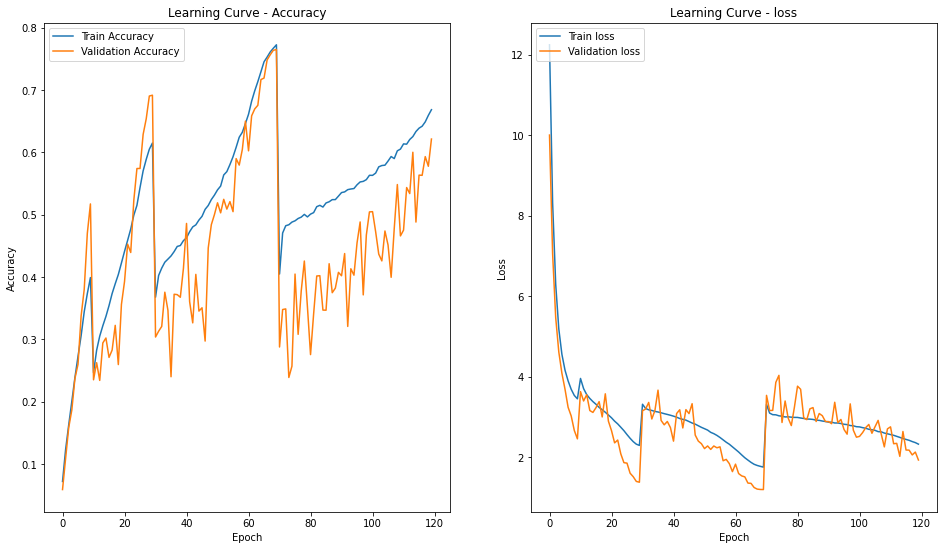

In [ ]:

def plotlearningcurve(history):
    plt.figure(figsize = (16,9))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'] , label = 'Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'] , label = 'Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend( loc='upper left')

    plt.subplot(122)
    plt.plot(history.history['loss'] , label = 'Train loss')
    plt.plot(history.history['val_loss'] , label = 'Validation loss')
    plt.title('Learning Curve - loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')


    plt.legend( loc='upper left')
    plt.show()
    
plotlearningcurve(history)

Performs decently at a peak of 76% validation score

The model does not overfit for the first 3 cycles, but overfits for the fourth cycle. 

First and second cycle : the validation accuracy  is higher than the train accuracy

Third cycle Cycle : the train accuracy is higher than the validation accuracy 

To decrease the number of epochs to 70, where validation accuracy  is highest, and 70 epochs the point before overfitting occurs

In [ ]:
artifact = run.use_artifact('yh1234/WRN cifar100 cutmix/model-image_aug:v71', type='model')
artifact_dir = artifact.download()
model =tf.keras.models.load_model(artifact_dir)

wandb: Downloading large artifact model-image_aug:v71, 288.08MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:0:3.3


In [ ]:
class_analysis(model, X_val, y_val)[:50]

313/313 [==============================] - 34s 110ms/step
Accuracy 0.7653


,precision,recall,f1-score,support
seal,0.452830,0.500000,0.475248,96.0
otter,0.474227,0.489362,0.481675,94.0
boy,0.527473,0.480000,0.502618,100.0
girl,0.571429,0.530612,0.550265,98.0
mouse,0.564356,0.542857,0.553398,105.0
woman,0.621359,0.547009,0.581818,117.0
lizard,0.554455,0.643678,0.595745,87.0
beaver,0.600000,0.645161,0.621762,93.0
bear,0.619048,0.631068,0.625000,103.0
man,0.623762,0.636364,0.630000,99.0


Seal performed the worst as its f1-score is 0.4758

##### Change the competitive inner imaging to Competitive_Inner_Imaging_SE_Block_1x1 , which is an alternative block in the same  [paper](https://arxiv.org/pdf/1807.08920.pdf)

In [ ]:
from wandb.keras import WandbCallback
config = dict(
    n_classes  = 100, 
    depth = 28, 
    k = 10 , 
    block = 'cmpese', 
    loss = 'categorical_crossentropy', 
    optimizer = 'sgd',  
    optimizerparams  = dict(learning_rate = 0.1, momentum = 0.9 , nesterov=True ), #added nesterov
    metric = ['categorical_accuracy'] , 
    regularisation =  0.0005,
    dropout = 0, 
    batchsize = 128 , 
    epochs = 100, 
    inputshape = (32,32,3), 
    dataaug = ['cutmix'],#change this if changed,
    activation = 'relu' , 
    annalparams= dict( max_lr = 0.1, min_lr = 0 , T=10, T_mul=2)

)
run = wandb.init(project = 'WRN cifar100 cutmix' , config = config , job_type="analysis" , name = 'image aug')
config = wandb.config

model = buildwrnmodel(config.depth,config.k, config.n_classes , config.inputshape, config.loss , config.activation ,
                      tf.keras.optimizers.SGD(**config.optimizerparams)  ,config.metric , block =Competitive_Inner_Imaging_SE_Block_1x1 # change the base block to cmpese 1x1 
                      )


In [ ]:

import numpy as np 
class SGDR(tf.keras.callbacks.Callback):
    """"Cosine annealing with warm restarts.
    
    As described in section 3 of "SGDR: Stochastic Gradient Descent with Warm Restarts" (Loshchilov & Hutter 2017).
    
    # Arguments
        max_lr: Maximum value of learning rate range.
        min_lr: Minimum value of learning rate range.
        T: Number of epochs between warm restarts.
        T_mul: At warm restarts, multiply `T` by this amount.
    """
    def __init__(self, max_lr, min_lr, T, T_mul=1 , n_epochs_passed =None ):
        self.n_epochs_passed = n_epochs_passed
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.T = T if n_epochs_passed is None else self.calculate_steps_since_last_restart(n_epochs_passed)
        self.T_cur = 0
        self.T_mul = T_mul
        self.step = 0


    def calculate_steps_since_last_restart(self,n_epochs_passed):
        totalsteps =0 
        i = 0 
        while totalsteps < n_epochs_passed:
            steps += (self.T * (self.T_mul**i) )
            i+=1 
        return totalsteps - n_epochs_passed

        
    def on_batch_begin(self, batch, logs=None):
        if self.T <= self.T_cur:

            self.T *= self.T_mul
            self.T_cur = 0
            self.step = 0
        K.set_value(self.model.optimizer.lr, self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(self.T_cur * np.pi / self.T))        )
        self.step += 1
        self.T_cur = self.step / self.params['steps']
            
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        
class ClearMemoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

import os 
try: 
    os.mkdir('./checkpoint') 
except OSError as error: 
    pass



callbacks = [SGDR(**config.annalparams), ClearMemoryCallback() , tf.keras.callbacks.EarlyStopping( monitor='val_loss'  , patience= 80) , WandbCallback()] 
try:
   history = model.fit( datasets_zipped_tensor, validation_data = val.batch(128), epochs = 70 , callbacks = callbacks)
except KeyboardInterrupt:
    pass
finally:
    wandb.finish()


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/70
313/313 [==============================] - ETA: 0s - loss: 11.4015 - categorical_accuracy: 0.0829

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.4s


313/313 [==============================] - 154s 357ms/step - loss: 11.4015 - categorical_accuracy: 0.0829 - val_loss: 9.8932 - val_categorical_accuracy: 0.0675 - lr: 0.0976
Epoch 2/70
313/313 [==============================] - ETA: 0s - loss: 7.7826 - categorical_accuracy: 0.1522

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 102s 321ms/step - loss: 7.7826 - categorical_accuracy: 0.1522 - val_loss: 7.0836 - val_categorical_accuracy: 0.1096 - lr: 0.0905
Epoch 3/70
313/313 [==============================] - ETA: 0s - loss: 5.8769 - categorical_accuracy: 0.2058

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.0s


313/313 [==============================] - 102s 321ms/step - loss: 5.8769 - categorical_accuracy: 0.2058 - val_loss: 5.2446 - val_categorical_accuracy: 0.1812 - lr: 0.0794
Epoch 4/70
313/313 [==============================] - ETA: 0s - loss: 4.8537 - categorical_accuracy: 0.2535

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 4.8537 - categorical_accuracy: 0.2535 - val_loss: 4.3962 - val_categorical_accuracy: 0.2169 - lr: 0.0655
Epoch 5/70
313/313 [==============================] - ETA: 0s - loss: 4.2671 - categorical_accuracy: 0.2895

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 4.2671 - categorical_accuracy: 0.2895 - val_loss: 3.8598 - val_categorical_accuracy: 0.2596 - lr: 0.0501
Epoch 6/70
313/313 [==============================] - ETA: 0s - loss: 3.8907 - categorical_accuracy: 0.3291

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.0s


313/313 [==============================] - 103s 321ms/step - loss: 3.8907 - categorical_accuracy: 0.3291 - val_loss: 3.3143 - val_categorical_accuracy: 0.3344 - lr: 0.0346
Epoch 7/70
313/313 [==============================] - ETA: 0s - loss: 3.6250 - categorical_accuracy: 0.3642

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 3.6250 - categorical_accuracy: 0.3642 - val_loss: 2.9843 - val_categorical_accuracy: 0.3884 - lr: 0.0207
Epoch 8/70
313/313 [==============================] - ETA: 0s - loss: 3.4245 - categorical_accuracy: 0.4028

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 3.4245 - categorical_accuracy: 0.4028 - val_loss: 2.6767 - val_categorical_accuracy: 0.4443 - lr: 0.0096
Epoch 9/70
313/313 [==============================] - ETA: 0s - loss: 3.2619 - categorical_accuracy: 0.4369

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 3.2619 - categorical_accuracy: 0.4369 - val_loss: 2.3610 - val_categorical_accuracy: 0.5311 - lr: 0.0025
Epoch 10/70
313/313 [==============================] - ETA: 0s - loss: 3.1747 - categorical_accuracy: 0.4611

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 102s 320ms/step - loss: 3.1747 - categorical_accuracy: 0.4611 - val_loss: 2.1626 - val_categorical_accuracy: 0.5820 - lr: 2.5186e-08
Epoch 11/70
313/313 [==============================] - 77s 239ms/step - loss: 3.7177 - categorical_accuracy: 0.3038 - val_loss: 3.9258 - val_categorical_accuracy: 0.2124 - lr: 0.0994
Epoch 12/70
313/313 [==============================] - 76s 238ms/step - loss: 3.5039 - categorical_accuracy: 0.3341 - val_loss: 3.5934 - val_categorical_accuracy: 0.2470 - lr: 0.0976
Epoch 13/70
313/313 [==============================] - 76s 237ms/step - loss: 3.3730 - categorical_accuracy: 0.3540 - val_loss: 2.8821 - val_categorical_accuracy: 0.3625 - lr: 0.0946
Epoch 14/70
313/313 [==============================] - 76s 237ms/step - loss: 3.2762 - categorical_accuracy: 0.3732 - val_loss: 3.0367 - val_categorical_accuracy: 0.3372 - lr: 0.0905
Epoch 15/70
313/313 [==============================] - 76s 238ms/step - loss: 3.2061 - categ

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 102s 320ms/step - loss: 2.6595 - categorical_accuracy: 0.5232 - val_loss: 1.9427 - val_categorical_accuracy: 0.5586 - lr: 0.0273
Epoch 24/70
313/313 [==============================] - ETA: 0s - loss: 2.5785 - categorical_accuracy: 0.5419

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 321ms/step - loss: 2.5785 - categorical_accuracy: 0.5419 - val_loss: 1.9378 - val_categorical_accuracy: 0.5504 - lr: 0.0206
Epoch 25/70
313/313 [==============================] - ETA: 0s - loss: 2.4947 - categorical_accuracy: 0.5614

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 321ms/step - loss: 2.4947 - categorical_accuracy: 0.5614 - val_loss: 1.8276 - val_categorical_accuracy: 0.5821 - lr: 0.0147
Epoch 26/70
313/313 [==============================] - ETA: 0s - loss: 2.3970 - categorical_accuracy: 0.5900

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 321ms/step - loss: 2.3970 - categorical_accuracy: 0.5900 - val_loss: 1.7366 - val_categorical_accuracy: 0.6083 - lr: 0.0096
Epoch 27/70
313/313 [==============================] - ETA: 0s - loss: 2.3004 - categorical_accuracy: 0.6102

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 102s 321ms/step - loss: 2.3004 - categorical_accuracy: 0.6102 - val_loss: 1.5030 - val_categorical_accuracy: 0.6619 - lr: 0.0055
Epoch 28/70
313/313 [==============================] - ETA: 0s - loss: 2.2208 - categorical_accuracy: 0.6302

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 320ms/step - loss: 2.2208 - categorical_accuracy: 0.6302 - val_loss: 1.3781 - val_categorical_accuracy: 0.6915 - lr: 0.0025
Epoch 29/70
313/313 [==============================] - ETA: 0s - loss: 2.1579 - categorical_accuracy: 0.6496

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 322ms/step - loss: 2.1579 - categorical_accuracy: 0.6496 - val_loss: 1.2812 - val_categorical_accuracy: 0.7177 - lr: 6.1951e-04
Epoch 30/70
313/313 [==============================] - ETA: 0s - loss: 2.1200 - categorical_accuracy: 0.6574

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 103s 321ms/step - loss: 2.1200 - categorical_accuracy: 0.6574 - val_loss: 1.2661 - val_categorical_accuracy: 0.7243 - lr: 6.2964e-09
Epoch 31/70
313/313 [==============================] - 77s 239ms/step - loss: 3.1264 - categorical_accuracy: 0.4119 - val_loss: 3.8528 - val_categorical_accuracy: 0.2569 - lr: 0.0998
Epoch 32/70
313/313 [==============================] - 77s 238ms/step - loss: 3.0577 - categorical_accuracy: 0.4475 - val_loss: 3.0865 - val_categorical_accuracy: 0.3398 - lr: 0.0994
Epoch 33/70
313/313 [==============================] - 77s 238ms/step - loss: 3.0435 - categorical_accuracy: 0.4555 - val_loss: 3.9458 - val_categorical_accuracy: 0.2596 - lr: 0.0986
Epoch 34/70
313/313 [==============================] - 77s 238ms/step - loss: 3.0131 - categorical_accuracy: 0.4654 - val_loss: 3.2431 - val_categorical_accuracy: 0.3302 - lr: 0.0976
Epoch 35/70
313/313 [==============================] - 76s 237ms/step - loss: 2.9945 - categ

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 102s 320ms/step - loss: 1.7023 - categorical_accuracy: 0.7679 - val_loss: 1.2482 - val_categorical_accuracy: 0.7437 - lr: 0.0025
Epoch 67/70
313/313 [==============================] - ETA: 0s - loss: 1.6643 - categorical_accuracy: 0.7783

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.0s


313/313 [==============================] - 103s 322ms/step - loss: 1.6643 - categorical_accuracy: 0.7783 - val_loss: 1.1925 - val_categorical_accuracy: 0.7584 - lr: 0.0014
Epoch 68/70
313/313 [==============================] - ETA: 0s - loss: 1.6329 - categorical_accuracy: 0.7848

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.3s


313/313 [==============================] - 103s 323ms/step - loss: 1.6329 - categorical_accuracy: 0.7848 - val_loss: 1.1470 - val_categorical_accuracy: 0.7696 - lr: 6.1755e-04
Epoch 69/70
313/313 [==============================] - ETA: 0s - loss: 1.6066 - categorical_accuracy: 0.7921

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.1s


313/313 [==============================] - 104s 323ms/step - loss: 1.6066 - categorical_accuracy: 0.7921 - val_loss: 1.1291 - val_categorical_accuracy: 0.7756 - lr: 1.5512e-04
Epoch 70/70
313/313 [==============================] - ETA: 0s - loss: 1.5975 - categorical_accuracy: 0.7904

wandb: Adding directory to artifact (/content/wandb/run-20221122_083736-2iy49utf/files/model-best)... Done. 2.0s


313/313 [==============================] - 103s 323ms/step - loss: 1.5975 - categorical_accuracy: 0.7904 - val_loss: 1.1279 - val_categorical_accuracy: 0.7771 - lr: 1.5741e-09


categorical_accuracy,▁▂▃▃▄▅▃▄▄▄▄▅▅▆▆▆▇▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▅▃▃▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
lr,█▇▆▃▂▁██▇▇▆▅▃▂▂▁▁████▇▇▇▆▆▅▅▅▄▃▃▃▂▂▂▁▁▁▁
val_categorical_accuracy,▁▁▂▄▅▆▂▄▃▄▄▅▅▆▆▇▇▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇███
val_loss,█▆▄▃▂▂▃▂▃▃▂▂▂▂▂▁▁▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
best_epoch,69
best_val_loss,1.12792
categorical_accuracy,0.7904
epoch,69
loss,1.59752


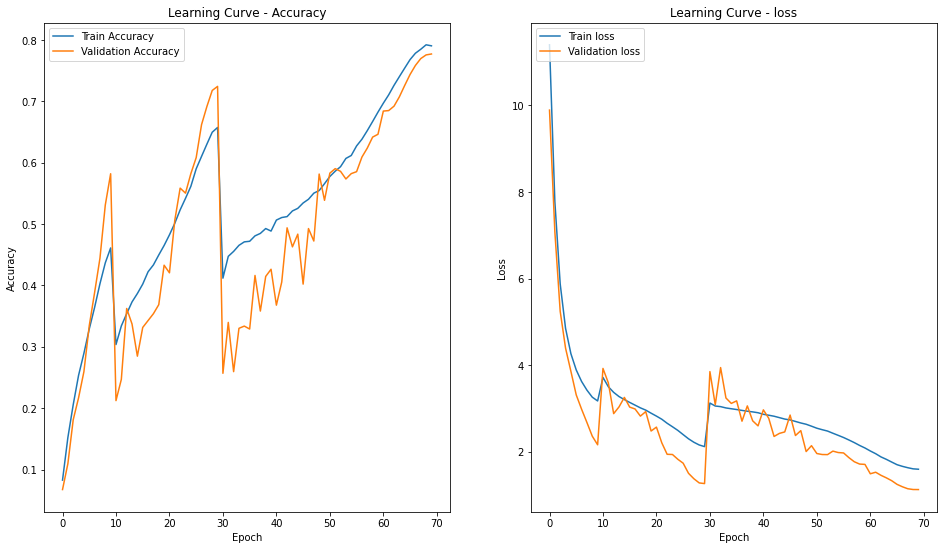

In [ ]:

def plotlearningcurve(history):
    plt.figure(figsize = (16,9))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'] , label = 'Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'] , label = 'Validation Accuracy')
    plt.title('Learning Curve - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend( loc='upper left')

    plt.subplot(122)
    plt.plot(history.history['loss'] , label = 'Train loss')
    plt.plot(history.history['val_loss'] , label = 'Validation loss')
    plt.title('Learning Curve - loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')


    plt.legend( loc='upper left')
    plt.show()
    
plotlearningcurve(history)

- Achieved 77.7% validation accuracy score
- For the third cycle From epoch 30 to 50 Model initially overfits 
- Epoch 50 to 70, the validation score 'catches up' to the training score

In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('yh1234/WRN cifar100 cutmix/model-image_aug:v93', type='model')
artifact_dir = artifact.download()
model =tf.keras.models.load_model(artifact_dir)

wandb: Downloading large artifact model-image_aug:v93, 287.46MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:0:4.8


In [ ]:
class_analysis(model, X_val, y_val)

313/313 [==============================] - 36s 112ms/step
Accuracy 0.7756


,precision,recall,f1-score,support
seal,0.450820,0.572917,0.504587,96.0
boy,0.532609,0.490000,0.510417,100.0
otter,0.534091,0.500000,0.516484,94.0
lizard,0.486239,0.609195,0.540816,87.0
beaver,0.522523,0.623656,0.568627,93.0
...,...,...,...,...
road,0.913978,0.913978,0.913978,93.0
orange,0.934783,0.905263,0.919786,95.0
chair,0.910714,0.953271,0.931507,107.0
wardrobe,0.907407,0.960784,0.933333,102.0


Compared to previous model
f1score of the worse class seal  improved by 0.47 to  0.50

# Model Evaluation

In [5]:
import wandb
run = wandb.init()
artifact = run.use_artifact('yh1234/WRN cifar100 cutmix/model-image_aug:v93', type='model')
artifact_dir = artifact.download()
model =tf.keras.models.load_model(artifact_dir)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Downloading large artifact model-image_aug:v93, 287.46MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:0:14.8


In [6]:



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_test = x_test/255
y_test =  tf.keras.utils.to_categorical(y_test,100)

169001437/169001437 [==============================] - 6s 0us/step


In [7]:
finalpredictions = model.predict(x_test)


313/313 [==============================] - 41s 105ms/step


In [8]:
label_mapping = {
0: 'apple',
1: 'aquarium_fish',
2: 'baby',

3: 'bear',

4: 'beaver',

5: 'bed',

6: 'bee',

7: 'beetle',

8: 'bicycle',

9: 'bottle',

10: 'bowl',

11: 'boy',

12: 'bridge',

13: 'bus',

14: 'butterfly',

15: 'camel',

16: 'can',

17: 'castle',

18: 'caterpillar',

19: 'cattle',

20: 'chair',

21: 'chimpanzee',

22: 'clock',

23: 'cloud',

24: 'cockroach',

25: 'couch',

26: 'cra',
27: 'crocodile',

28: 'cup',

29: 'dinosaur',

30: 'dolphin',

31: 'elephant',

32: 'flatfish',

33: 'forest',

34: 'fox',

35: 'girl',

36: 'hamster',

37: 'house',

38: 'kangaroo',

39: 'keyboard',
40: 'lamp',

41: 'lawn_mower',

42: 'leopard',

43: 'lion',
44: 'lizard',

45: 'lobster',

46: 'man',

47: 'maple_tree',

48: 'motorcycle',

49: 'mountain',

50: 'mouse',

51: 'mushroom',

52: 'oak_tree',

53: 'orange',

54: 'orchid',

55: 'otter',

56: 'palm_tree',

57: 'pear',

58: 'pickup_truck',

59: 'pine_tree',

60: 'plain',

61: 'plate',
62: 'poppy',

63: 'porcupine',

64: 'possum',

65: 'rabbit',

66: 'raccoon',

67: 'ray',

68: 'road',

69: 'rocket',

70: 'rose',

71: 'sea',

72: 'seal',

73: 'shark',

74: 'shrew',

75: 'skunk',

76: 'skyscraper',

77: 'snail',

78: 'snake',

79: 'spider',

80: 'squirrel',

81: 'streetcar',

82: 'sunflower',

83: 'sweet_pepper',

84: 'table',

85: 'tank',

86: 'telephone',

87: 'television',

88: 'tiger',

89: 'tractor',

90: 'train',

91: 'trout',

92: 'tulip',

93: 'turtle',

94: 'wardrobe',

95: 'whale',

96: 'willow_tree',

97: 'wolf',

98: 'woman',

99: 'worm'
}

In [9]:
from sklearn.metrics import classification_report , accuracy_score
import numpy as np 
finalpredictions_final=np.argmax(finalpredictions, axis=1)
y_test_final=np.argmax(y_test, axis=1)


In [10]:
classificationresults = classification_report(y_test_final ,finalpredictions_final  , target_names = label_mapping.values() , output_dict =True)
import pandas as pd 
print('accuracy : ' ,accuracy_score(y_test_final ,finalpredictions_final ) )
display(pd.DataFrame(classificationresults).T.sort_values('f1-score')[:20])

accuracy :  0.773


,precision,recall,f1-score,support
otter,0.605263,0.46,0.522727,100.0
seal,0.483333,0.58,0.527273,100.0
shrew,0.475862,0.69,0.563265,100.0
woman,0.540541,0.60,0.568720,100.0
man,0.572816,0.59,0.581281,100.0
boy,0.593750,0.57,0.581633,100.0
beaver,0.543103,0.63,0.583333,100.0
girl,0.570093,0.61,0.589372,100.0
lizard,0.561404,0.64,0.598131,100.0
shark,0.564516,0.70,0.625000,100.0


Achieved 77% accuracy, which is suprising to me as the number of classes is a lot more than the task with 20 classes

In [11]:
wrong_example_mask = y_test_final != finalpredictions_final
X_test_wrong = x_test[wrong_example_mask]
y_test_wrong = y_test_final[wrong_example_mask]
y_pred_wrong = finalpredictions_final[wrong_example_mask]

In [12]:
import matplotlib.pyplot as plt


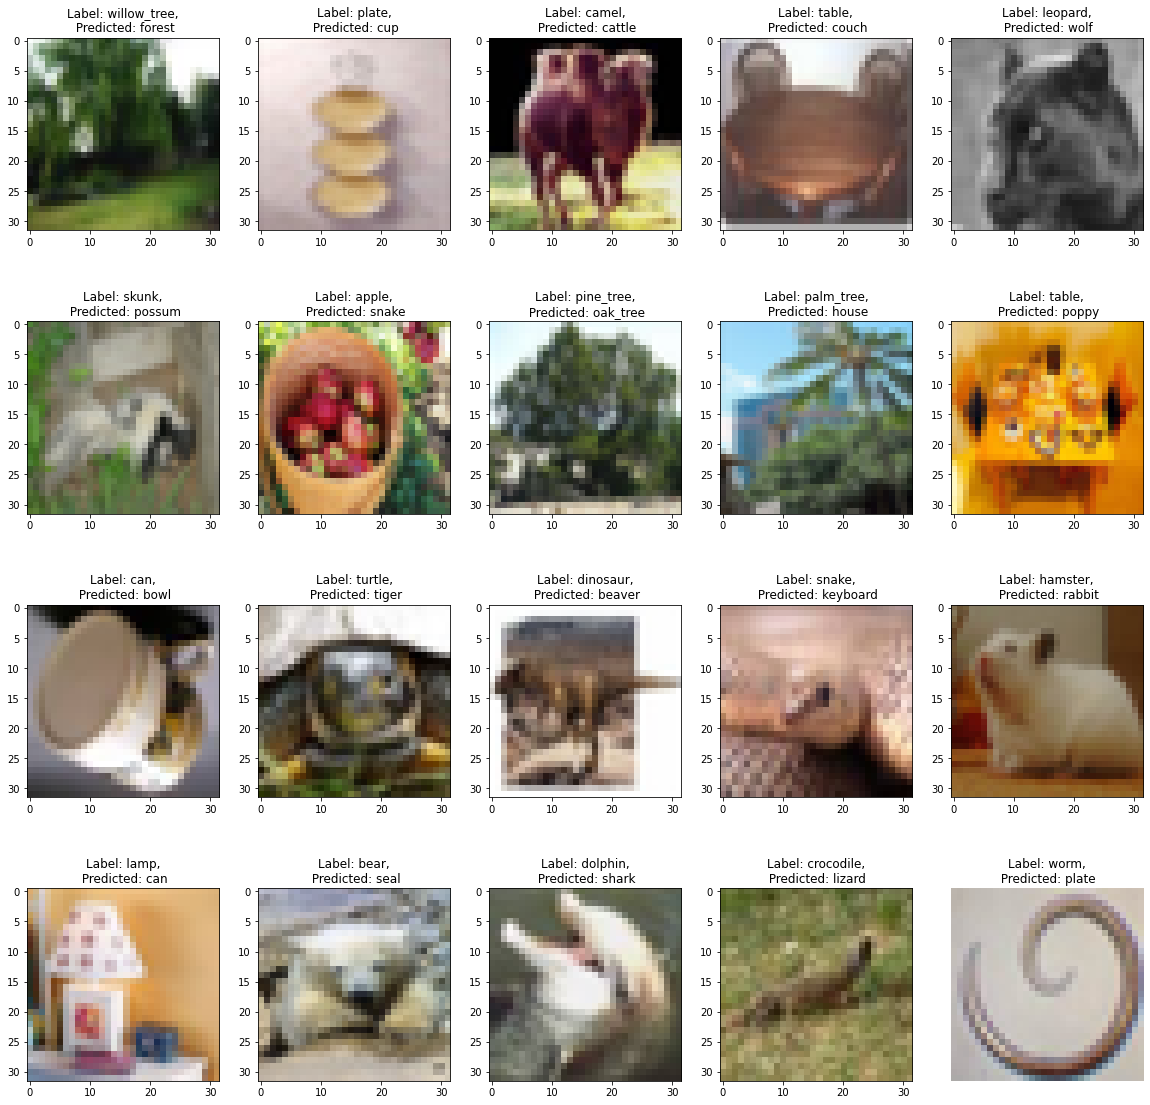

In [13]:
random_idxs = np.random.choice(X_test_wrong.shape[0], 20, replace=False)
fig, ax = plt.subplots(4, 5, figsize=(20, 20))
plt.axis("off")
for idx, subplot in zip(random_idxs, ax.ravel()):
    
    pred = label_mapping[y_pred_wrong[idx]]
    actual = label_mapping[y_test_wrong[idx]]
    subplot.imshow(X_test_wrong[idx], cmap='gray')
    subplot.set_title(f"Label: {actual},\n Predicted: {pred}")